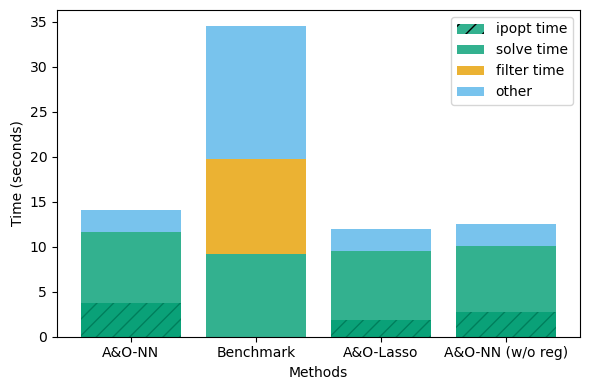

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for your computation time and sub-components
order = [2, 0, 1, 3]
methods = np.array(['Benchmark', 'A&O-Lasso', 'A&O-NN', 'A&O-NN (w/o reg)'])[order]
ipopt_time = np.array([0.0, 1.9, 3.7, 2.7])[order]
solve_time = np.array([9.2, 9.5, 11.6, 10.1])[order]
filter_time = np.array([10.6, 0.0, 0.0, 0.0])[order]
total_time = np.array([34.6, 12.0, 14.1, 12.5])[order]
remaining_time = total_time - solve_time - filter_time

# Total time as a sum of sub-components
total_time = [sum(x) for x in zip(solve_time, filter_time, remaining_time)]

# Create subplots for each sub-component and stack them
plt.figure(figsize=(6, 4))
plt.bar(methods, ipopt_time, label='ipopt time', alpha=0.8, color='#009E73', hatch='//')
plt.bar(methods, solve_time, label='solve time', alpha=0.8, color='#009E73')
plt.bar(methods, filter_time, bottom=solve_time, label='filter time', alpha=0.8, color='#E69F00')
plt.bar(methods, remaining_time, bottom=np.array(solve_time) + np.array(filter_time), label='other', alpha=0.8, color='#56B4E9')

# Set labels and title
plt.xlabel('Methods')
plt.ylabel('Time (seconds)')
# plt.title('Computation Time')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('time_result.png', dpi=300)
plt.show()

In [ ]:
scenario,stage1_cost,stage1_pen,stage2_pen,objective,load_time,solve_time,filter_time,total_time,second_stage_runtime,ipopt_obj,ipopt_time,termination_status
scenario_323,34535.7068551815,0.0308285270821895,1432365.8101461309,1466901.5478298394,2.326334953308105,9.84272813796997,10.750673055648804,36.1818630695343,32.94106078147888
scenario_323,44651.65768577957,0.3342297100163009,559421.889957582,604073.8818730715,2.3418068885803223,12.075850009918211,0.0,14.647552013397217,45.49281311035156,299480.8936726861,4.233518123626709,LOCALLY_SOLVED
scenario_323,45974.6053184144,0.3970690830484459,1530775.429493331,1576750.431880828,2.1467981338500977,9.460791826248167,0.0,11.81804609298706,43.60617685317993,270878.34396319656,2.148043155670166,LOCALLY_SOLVED
scenario_323,38310.0482009297,0.7028763705788603,2272073.647627176,2310384.398704476,2.1451640129089355,10.012382984161375,0.0,12.383203983306885,46.249058961868286,69887.41925324101,2.6077160835266118,LOCALLY_SOLVED






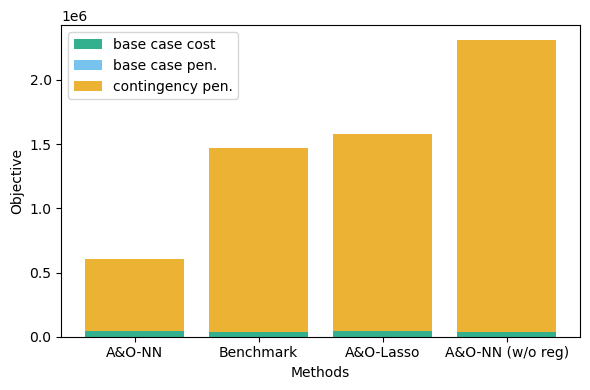

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for your computation time and sub-components
order = [1, 0, 2, 3]
methods = np.array(['Benchmark', 'A&O-NN', 'A&O-Lasso', 'A&O-NN (w/o reg)'])[order]
stage1_cost = np.array([34535.7, 44651.7, 45974.6, 38310.0])[order]
stage1_pen = np.array([0.0308285, 0.33423, 0.397069, 0.702876])[order]
stage2_pen = np.array([1432365.8, 559421.9, 1530775.4, 2272073.6])[order]
objective = np.array([1466901.5, 604073.9, 1576750.4, 2310384.3])[order]

# Total time as a sum of sub-components
total_time = [sum(x) for x in zip(stage1_cost, stage1_pen, stage2_pen)]

# Create subplots for each sub-component and stack them
plt.figure(figsize=(6, 4))
plt.bar(methods, stage1_cost, label='base case cost', alpha=0.8, color='#009E73')
plt.bar(methods, stage1_pen, bottom=stage1_cost, label='base case pen.', alpha=0.8, color='#56B4E9')
plt.bar(methods, stage2_pen, bottom=stage1_pen+stage1_cost, label='contingency pen.', alpha=0.8, color='#E69F00')
# plt.bar(methods, remaining_time, bottom=np.array(solve_time) + np.array(filter_time), label='other', alpha=0.8, color='#56B4E9')

# Set labels and title
plt.xlabel('Methods')
plt.ylabel('Objective')
# plt.title('Computation Time')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('obj_result.png', dpi=300)
plt.show()

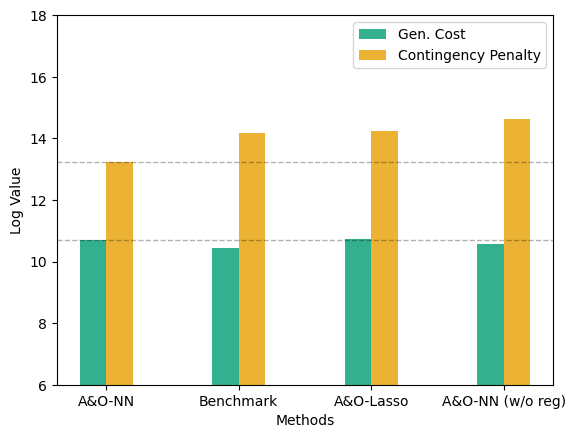

In [38]:
#plt.figure(figsize=(8,6))
ind = np.arange(len(methods))
# Width of a bar 
width = 0.2      

# Plotting
plt.bar(ind, np.log(stage1_cost) , width, label='Gen. Cost',alpha=0.8, color='#009E73')
plt.bar(ind + width, np.log(stage2_pen), width, label='Contingency Penalty', alpha=0.8, color='#E69F00')

plt.xlabel('Methods')
plt.ylabel('Log Value')
# plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, methods)

# add a horizontal line
plt.axhline(y=np.log(stage1_cost)[0], color='black', linestyle='--', alpha=0.3, linewidth=1)
plt.axhline(y=np.log(stage2_pen)[0], color='black', linestyle='--', alpha=0.3, linewidth=1)

# Finding the best position for legends and putting it
#plt.legend(loc='best')
plt.ylim(6, 16)
plt.legend()
plt.savefig('obj_result.png', dpi=300)
plt.show()